In [5]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
!pip install missingno
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
!pip install xgboost
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 825.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/124.9 MB 1.8 MB/s eta 0:01:10
   ---------------------------------------- 0.5/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.0/124.9 MB 4.9 MB/s eta 0:00:26
   ---------------------------------------- 1.1/124.9 MB 4.9 MB/s eta 0:00:26
    --------------------------------------- 1.9/124.9 MB 6.2 MB/s eta 0:00:20
    --------------------------------------- 2.4/124.9 MB 6.8 MB/s eta 0:00:18
   - -------------------------------------- 3.2/124.9 MB 8.2 MB/s eta 0:00:15
   - -------------------------------------- 3.4/124.9 MB 7.8 MB/s eta 0:00:16
   - -------------------------------------- 4.3/124.9 MB 8.5 MB/s eta 0:00:15
   - -------------------------------------- 4.8/124.9 MB 8.9 MB/s eta 0:00:1

In [7]:
train = pd.read_csv('Cleaned_Laptop_data.csv')

In [9]:
train

brand     model processor_brand     processor_name processor_gnrtn  \
0     Lenovo   A6-9225             AMD  A6-9225 Processor            10th   
1     Lenovo   Ideapad             AMD           APU Dual            10th   
2      Avita      PURA             AMD           APU Dual            10th   
3      Avita      PURA             AMD           APU Dual            10th   
4      Avita      PURA             AMD           APU Dual            10th   
..       ...       ...             ...                ...             ...   
891     ASUS       ROG             AMD            Ryzen 9         Missing   
892     ASUS     Ryzen             AMD            Ryzen 9         Missing   
893     ASUS     Ryzen             AMD            Ryzen 9         Missing   
894  SAMSUNG    Galaxy        Qualcomm      Snapdragon 7c         Missing   
895   Lenovo  Thinkpad             AMD            Ryzen 5            10th   

      ram_gb ram_type      ssd      hdd       os  ... display_size  warranty  \
0    4 GB GB     DDR4     0 GB  1024 GB  Windows  ...      Missing         0   
1    4 GB GB     DDR4     0 GB   512 GB  Windows  ...      Missing         0   
2    4 GB GB     DDR4   128 GB     0 GB  Windows  ...      Missing         0   
3    4 GB GB     DDR4   128 GB     0 GB  Windows  ...      Missing         0   
4    4 GB GB     DDR4   256 GB     0 GB  Windows  ...      Missing         0   
..       ...      ...      ...      ...      ...  ...          ...       ...   
891  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...           16         1   
892  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...      Missing         1   
893  4 GB GB     DDR4  1024 GB     0 GB  Windows  ...           16         1   
894  4 GB GB  LPDDR4X     0 GB   512 GB  Windows  ...      Missing         0   
895  8 GB GB     DDR4   512 GB     0 GB      DOS  ...           14         0   

    Touchscreen msoffice  latest_price old_price discount  star_rating  \
0            No       No         24990     32790       23          3.7   
1            No       No         19590     21325        8          3.6   
2            No       No         19990     27990       28          3.7   
3            No       No         21490     27990       23          3.7   
4            No       No         24990     33490       25          3.7   
..          ...      ...           ...       ...      ...          ...   
891          No       No        144990    194990       25          0.0   
892          No       No        149990         0        0          0.0   
893          No       No        142990         0        0          0.0   
894          No       No         38990     47990       18          0.0   
895          No       No         57490     78400       26          4.2   

     ratings  reviews  
0         63       12  
1       1894      256  
2       1153      159  
3       1153      159  
4       1657      234  
..       ...      ...  
891        0        0  
892        0        0  
893        0        0  
894        0        0  
895       18        4  

[896 rows x 23 columns]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [13]:
train.describe()

graphic_card_gb    warranty   latest_price      old_price    discount  \
count       896.000000  896.000000     896.000000     896.000000  896.000000   
mean          1.198661    0.691964   76309.860491   88134.154018   18.527902   
std           2.057454    0.606282   46613.354368   55719.645554   10.508486   
min           0.000000    0.000000   13990.000000       0.000000    0.000000   
25%           0.000000    0.000000   45490.000000   54940.500000   11.000000   
50%           0.000000    1.000000   63494.000000   78052.500000   19.000000   
75%           2.000000    1.000000   89090.000000  111019.500000   26.000000   
max           8.000000    3.000000  441990.000000  377798.000000   57.000000   

       star_rating       ratings      reviews  
count   896.000000    896.000000   896.000000  
mean      2.980469    367.391741    46.152902  
std       1.965254   1106.309355   136.079586  
min       0.000000      0.000000     0.000000  
25%       0.000000      0.000000     0.000000  
50%       4.100000     19.000000     3.000000  
75%       4.400000    179.500000    23.250000  
max       5.000000  15279.000000  1947.000000

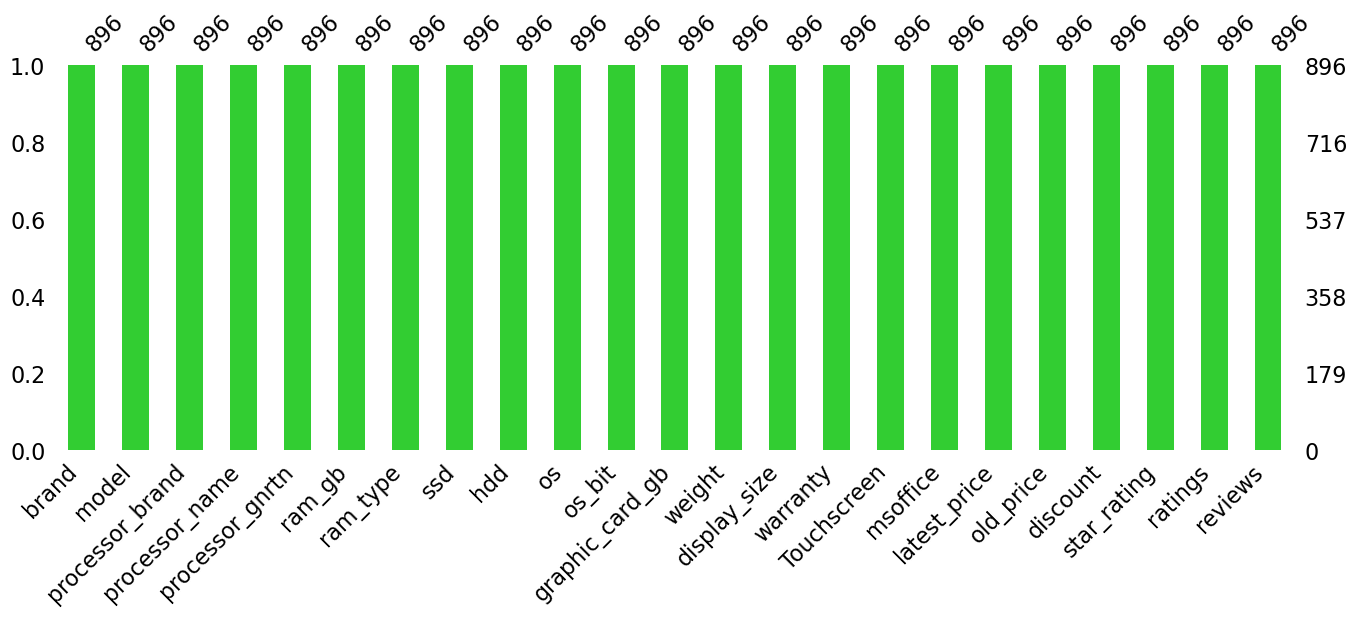

In [15]:
#EDA#
msno.bar(train, figsize = (16,5),color = "#32CD32")
plt.show()

In [17]:
train.duplicated().sum()

20

In [19]:
train=train.drop_duplicates(keep='last')

In [21]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'brand' has '21' unique values
Feature 'model' has '117' unique values
Feature 'processor_brand' has '5' unique values
Feature 'processor_name' has '28' unique values
Feature 'processor_gnrtn' has '8' unique values
Feature 'ram_gb' has '4' unique values
Feature 'ram_type' has '6' unique values
Feature 'ssd' has '8' unique values
Feature 'hdd' has '4' unique values
Feature 'os' has '3' unique values
Feature 'os_bit' has '2' unique values
Feature 'graphic_card_gb' has '5' unique values
Feature 'weight' has '3' unique values
Feature 'display_size' has '16' unique values
Feature 'warranty' has '4' unique values
Feature 'Touchscreen' has '2' unique values
Feature 'msoffice' has '2' unique values
Feature 'latest_price' has '429' unique values
Feature 'old_price' has '564' unique values
Feature 'discount' has '48' unique values
Feature 'star_rating' has '30' unique values
Feature 'ratings' has '310' unique values
Feature 'reviews' has '152' unique values


Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

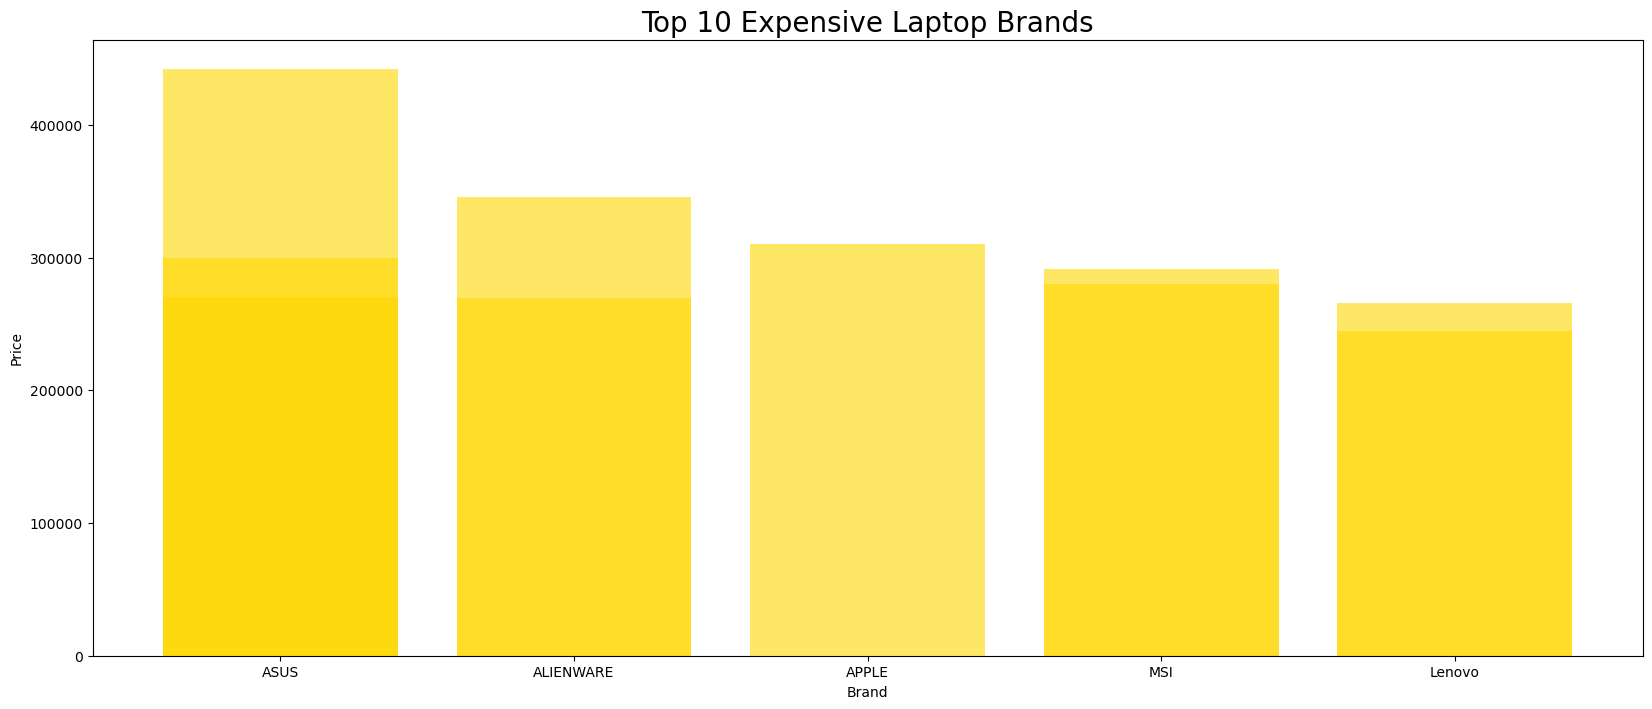

In [23]:
top10 = train.nlargest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

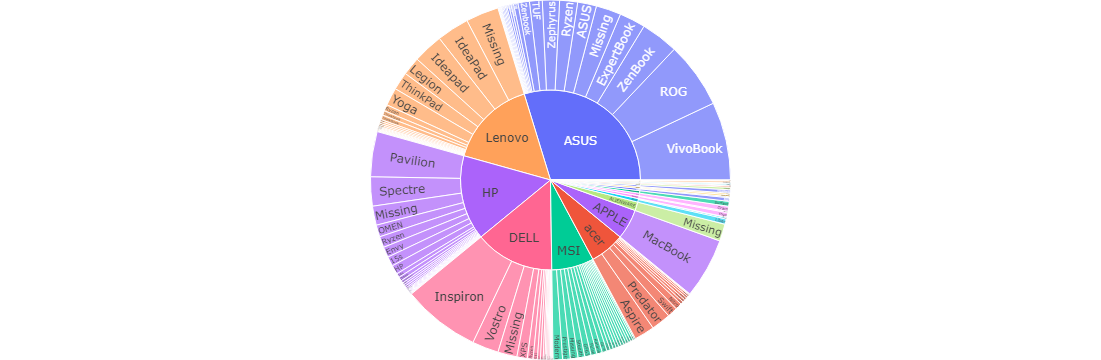

In [25]:
import plotly.express as px
fig = px.sunburst(train, path=['brand', 'model'], values='latest_price',color='brand')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

Text(0.5, 1.0, 'Top 10 Cheap Laptop Models')

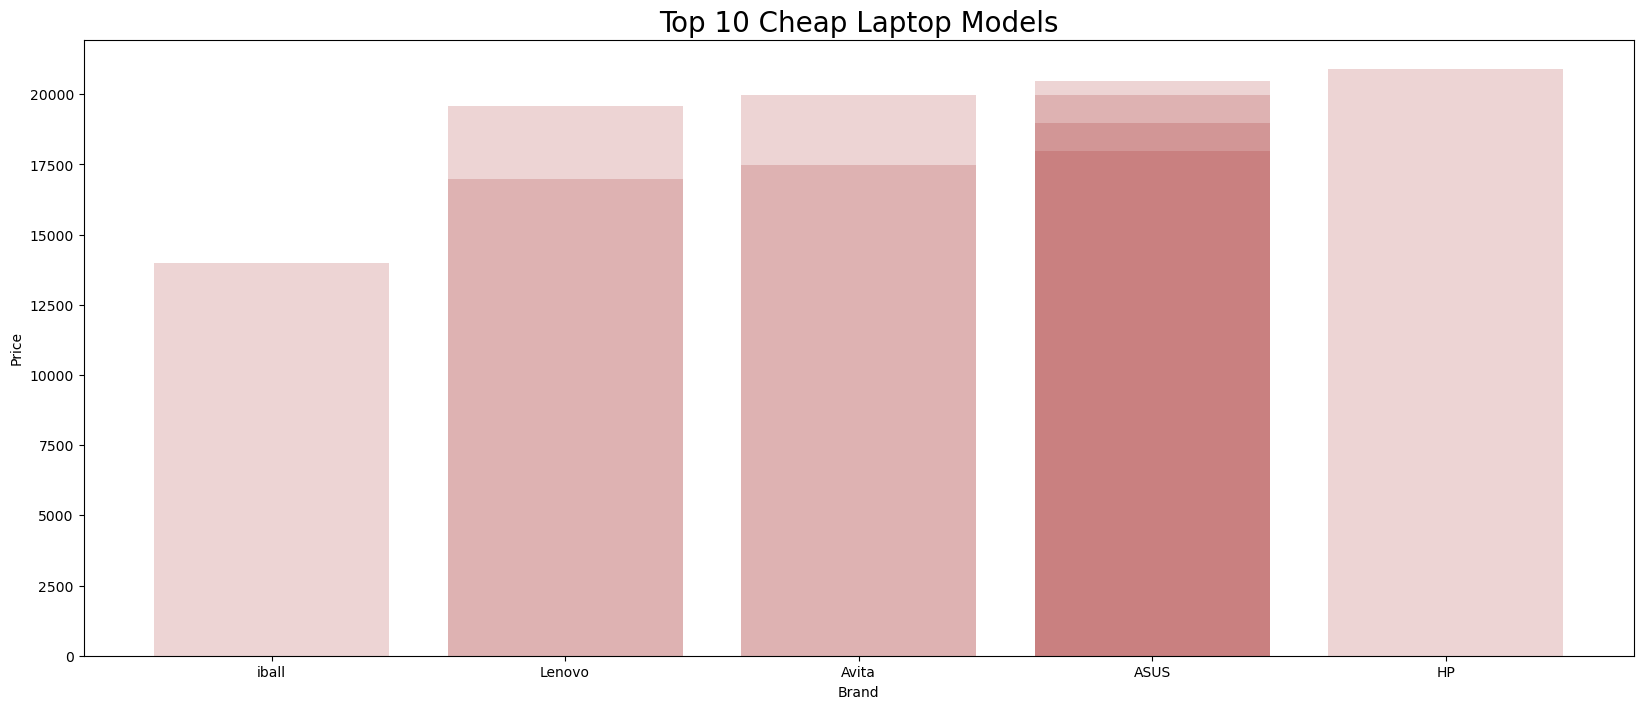

In [27]:
top10 = train.nsmallest(10,'latest_price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['latest_price'],color='brown',alpha=0.2)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Cheap Laptop Models", fontsize = 20)

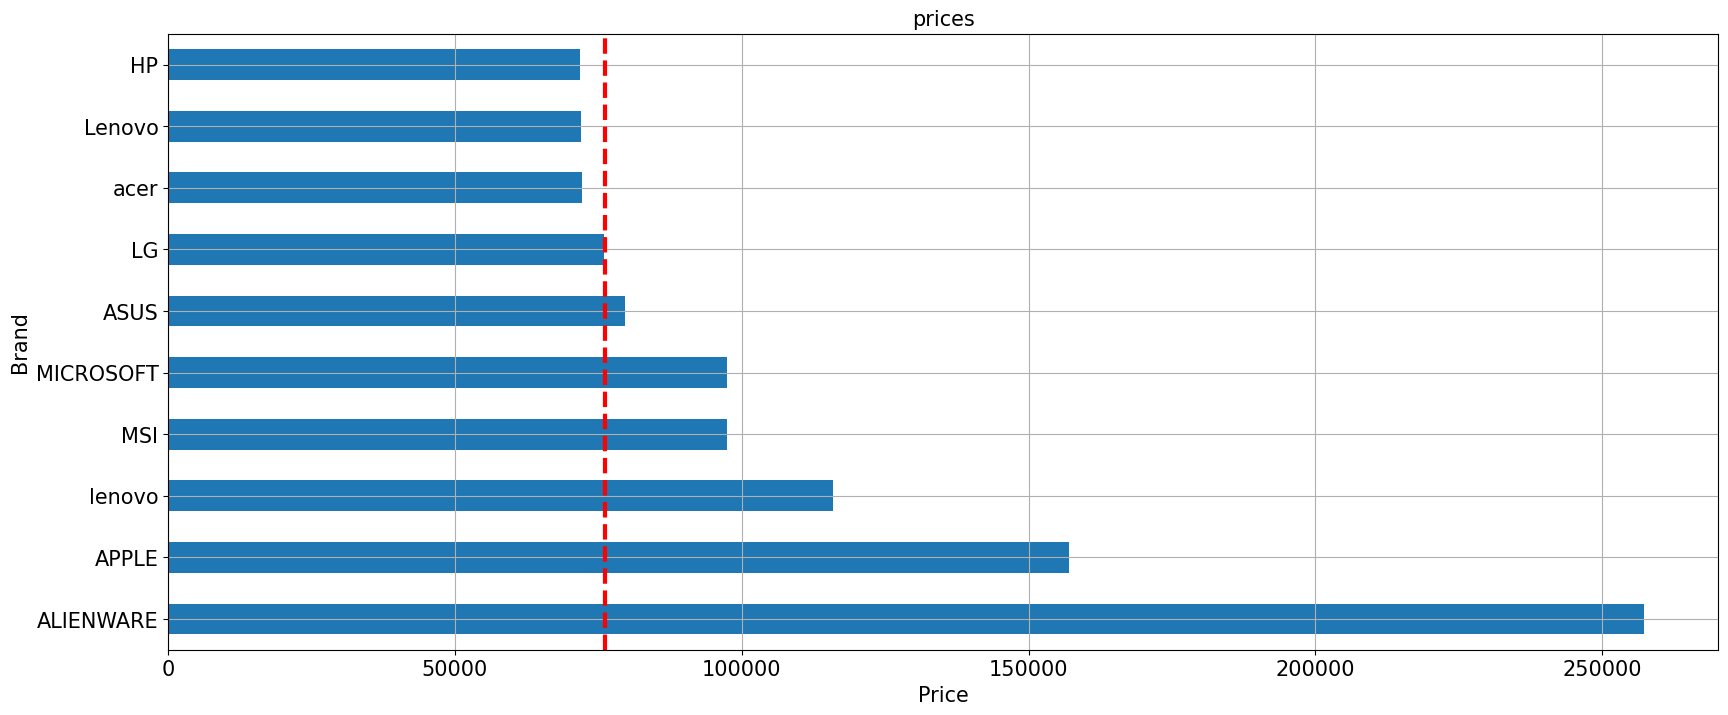

In [29]:
train[['brand','latest_price']].groupby('brand').mean().sort_values(by='latest_price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8), 
        fontsize = 15, rot =0, legend = None)
plt.axvline(train['latest_price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Brand', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

In [31]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [33]:
numeric=['latest_price', 'old_price','ratings', 'reviews']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

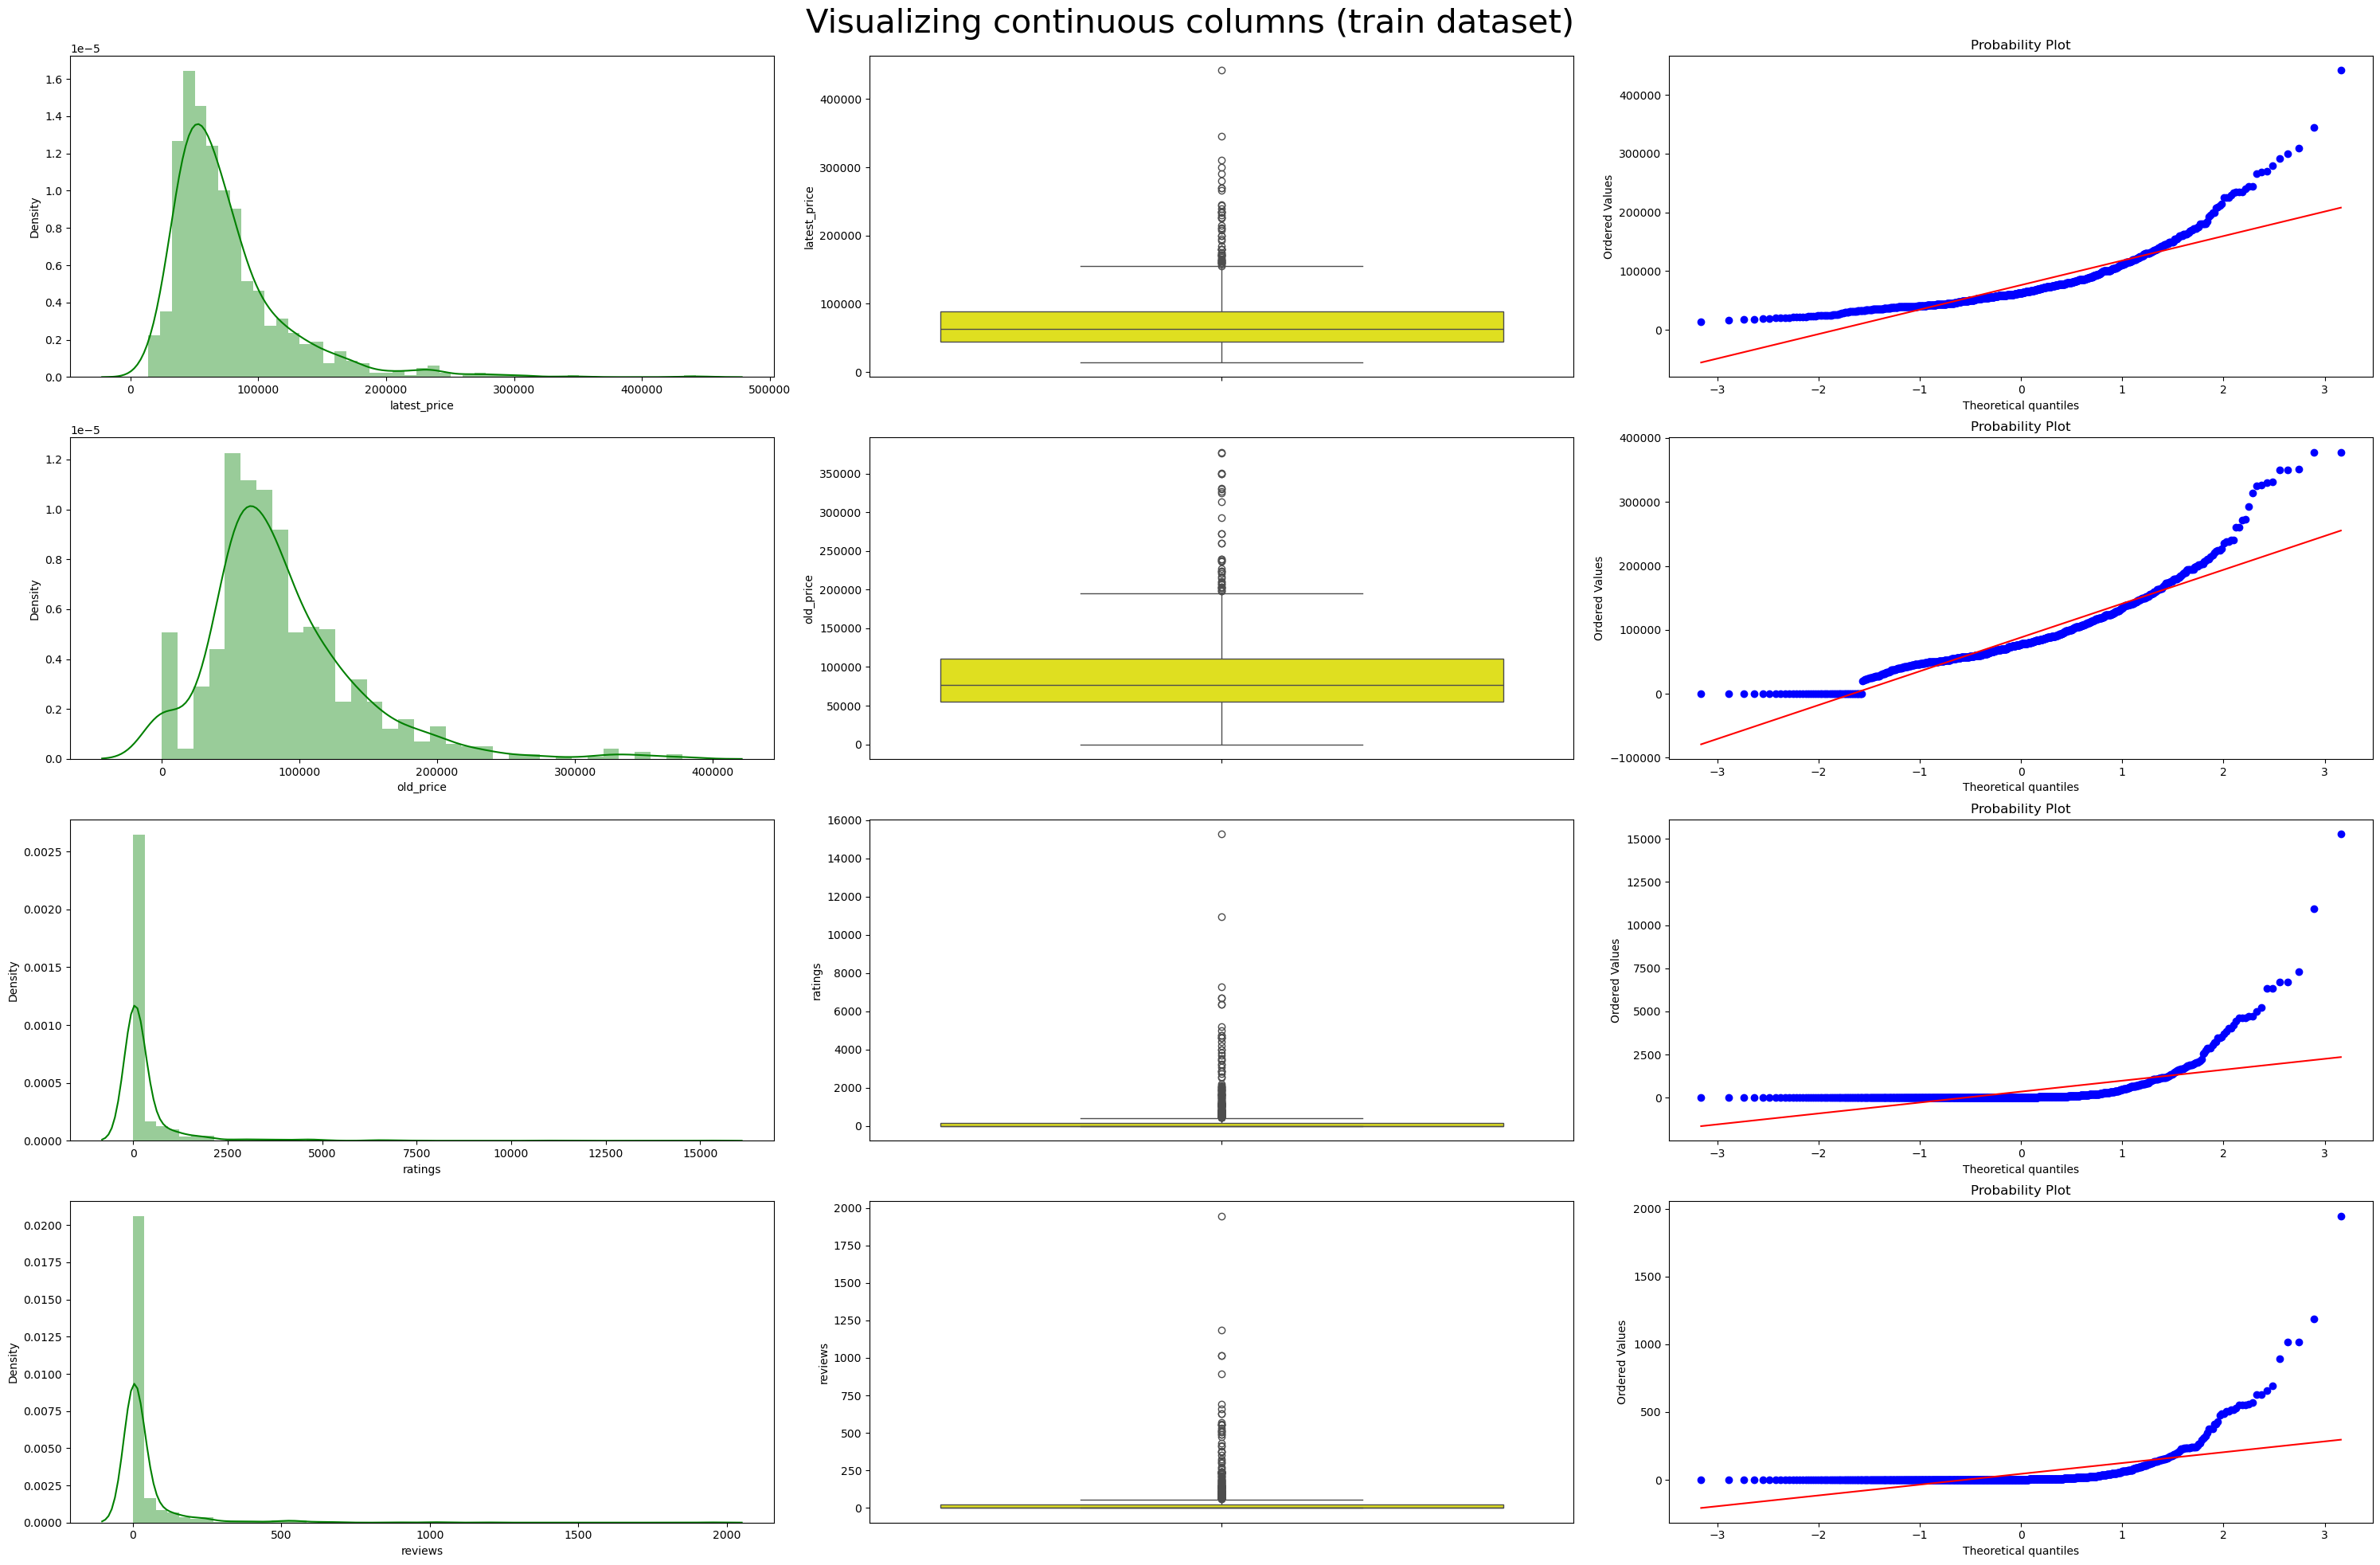

In [35]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

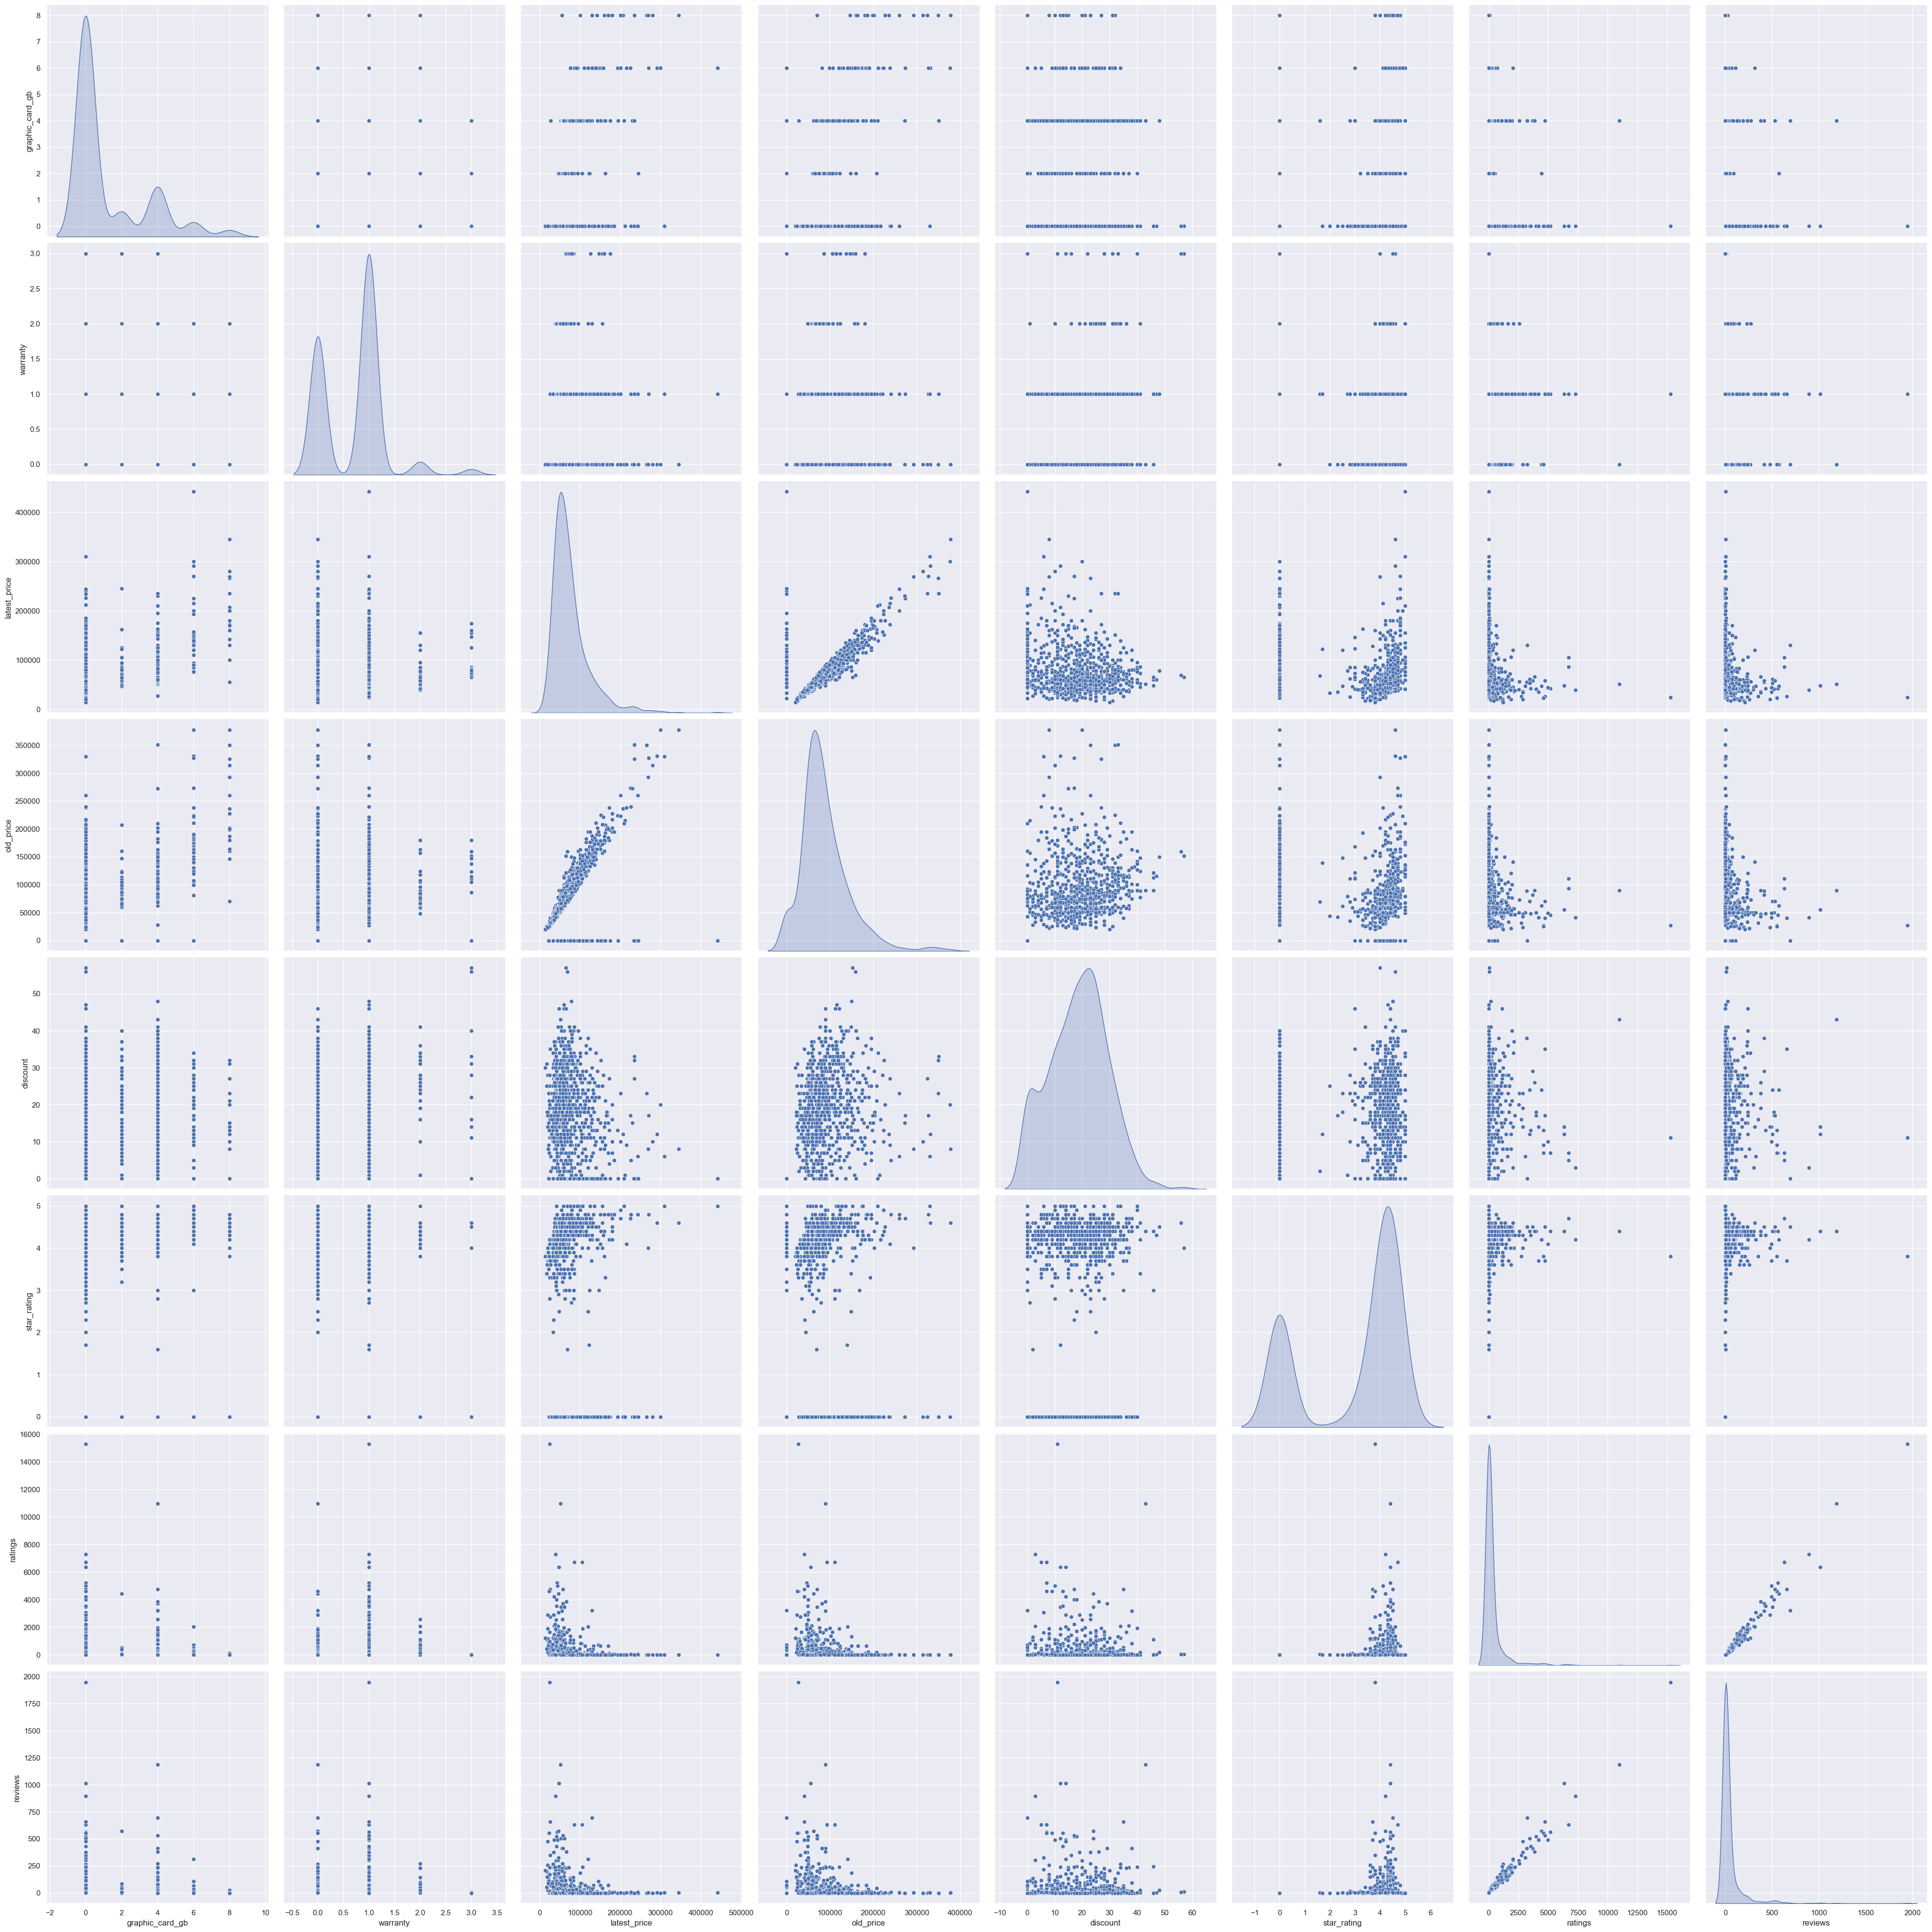

In [39]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [40]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [41]:
categorical_features=['brand', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'discount', 'star_rating']

<Figure size 1500x2500 with 0 Axes>

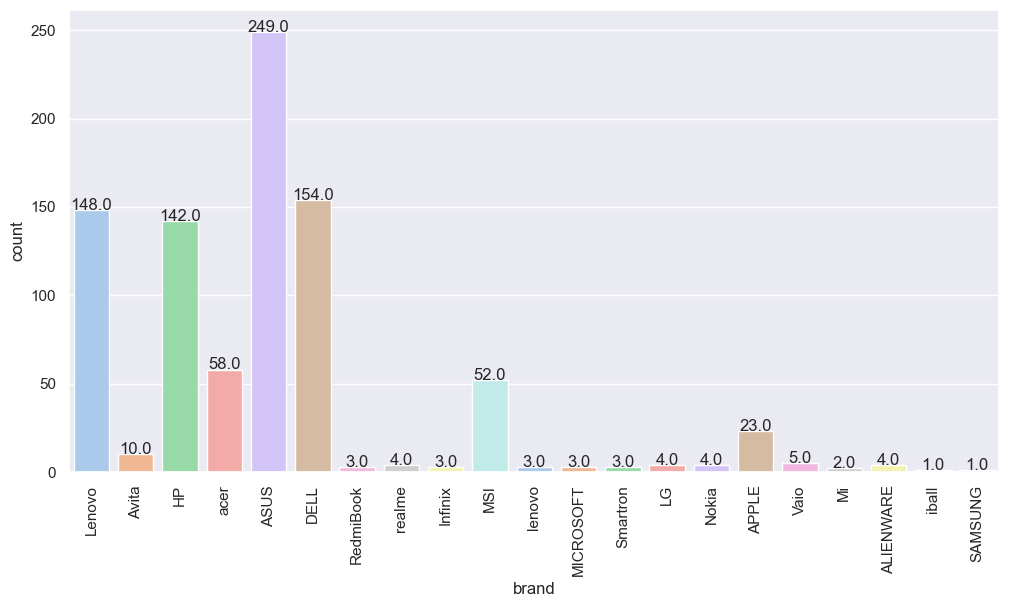

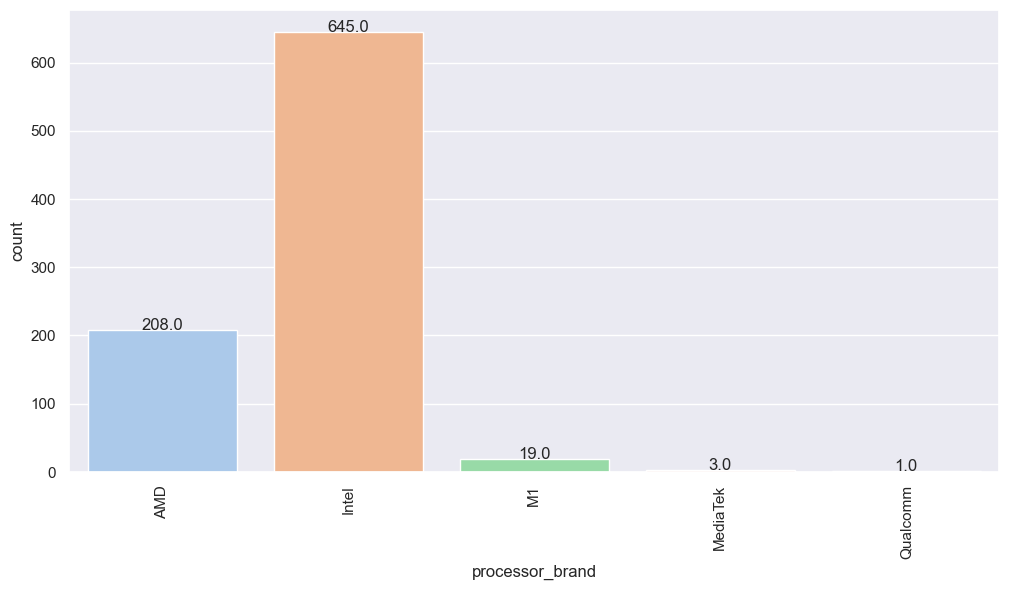

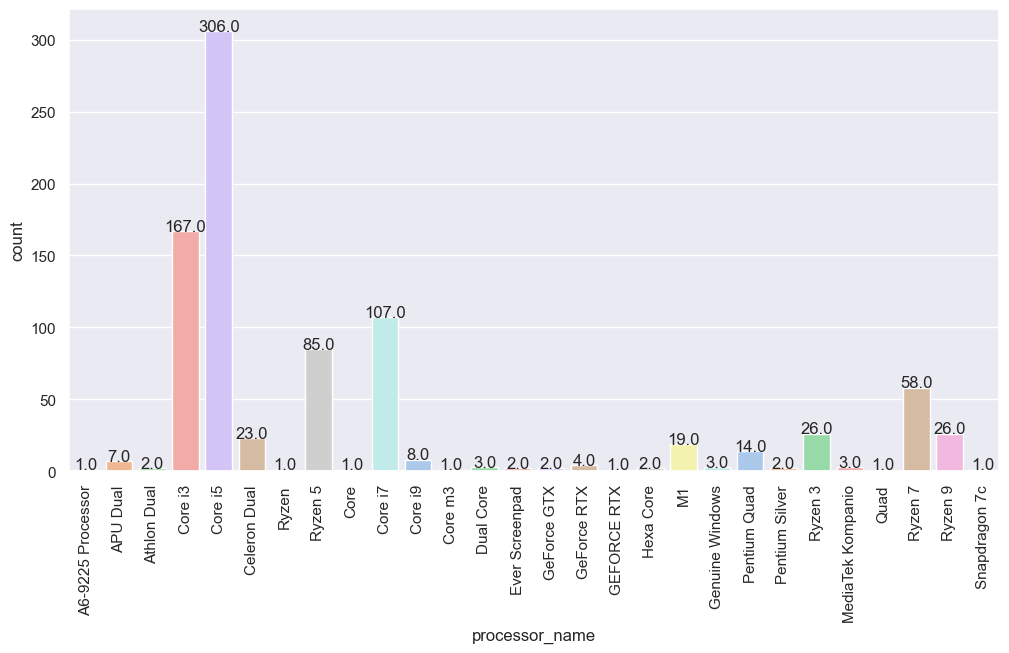

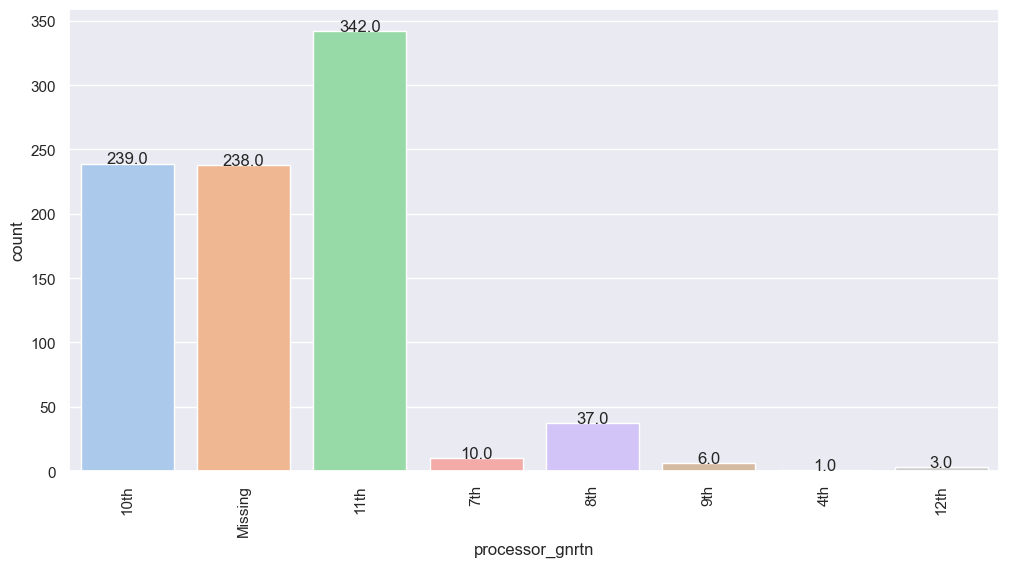

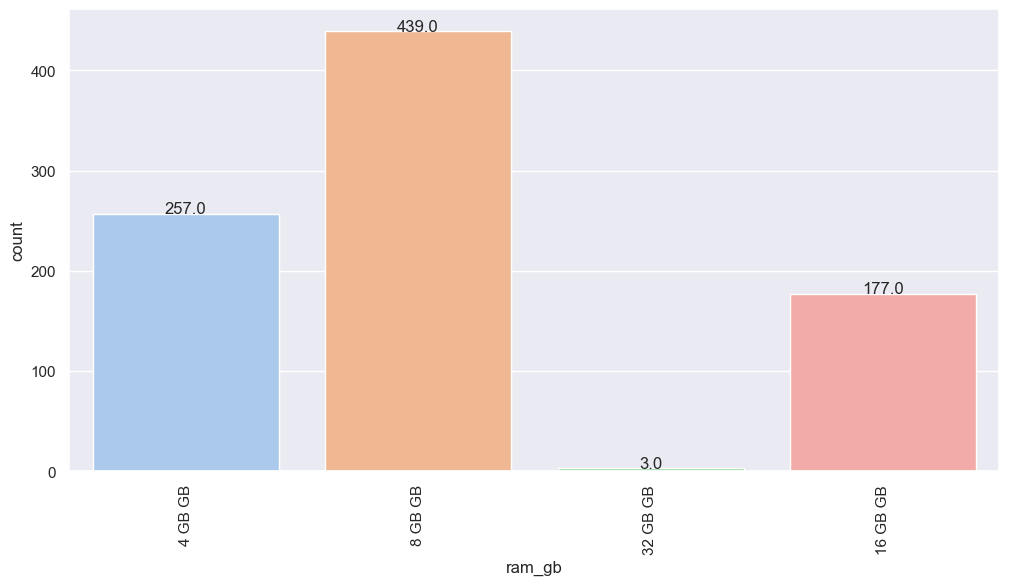

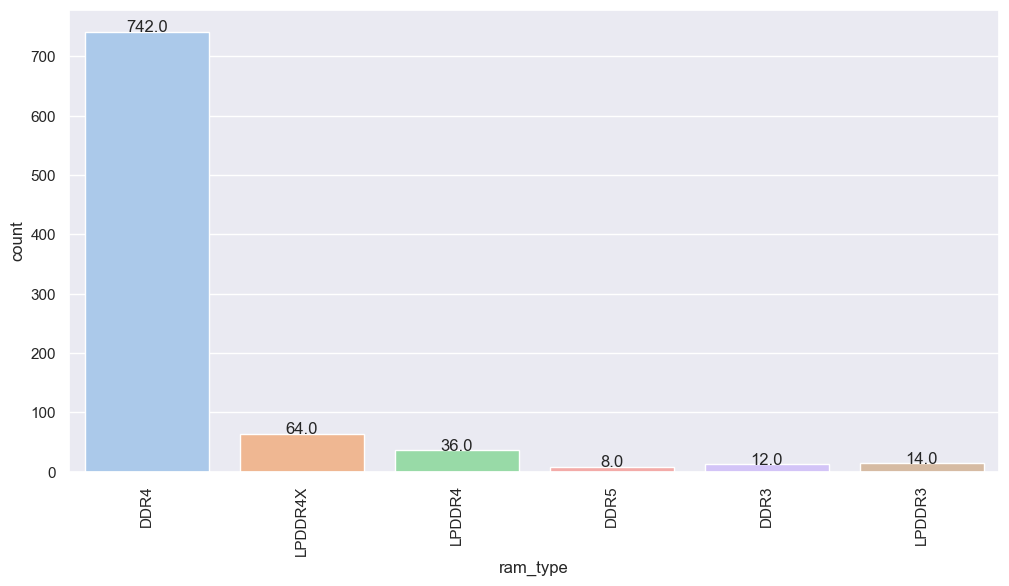

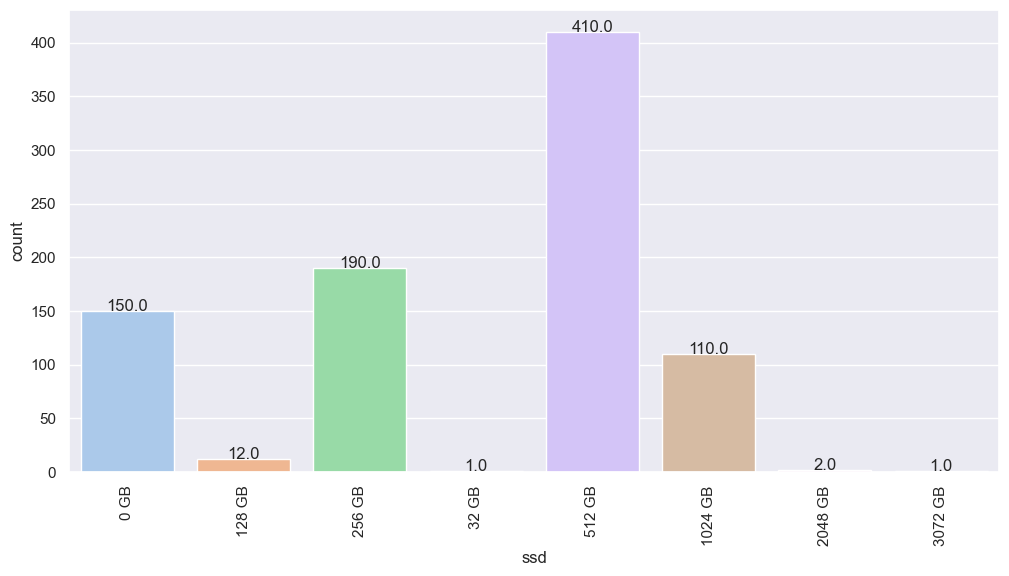

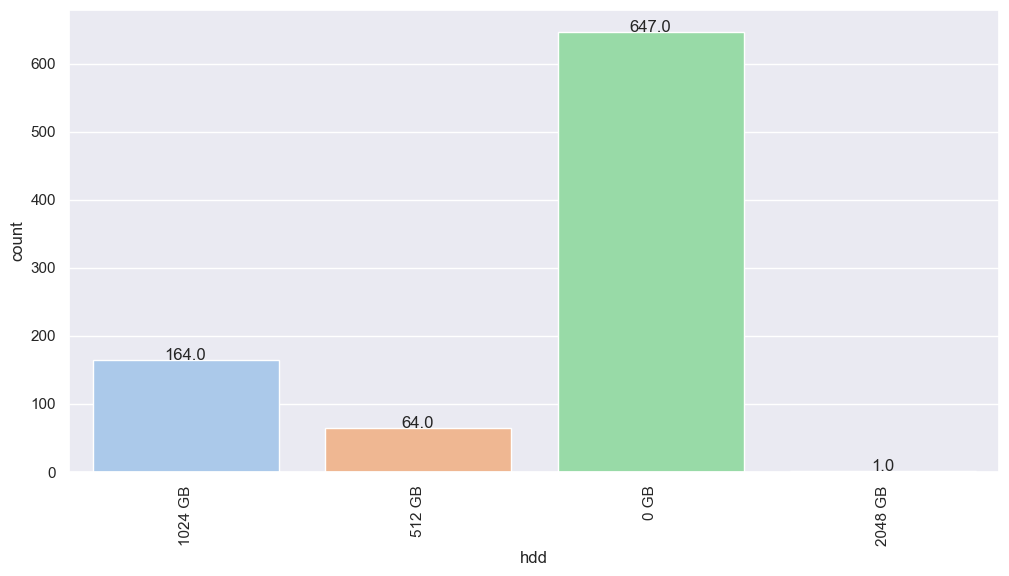

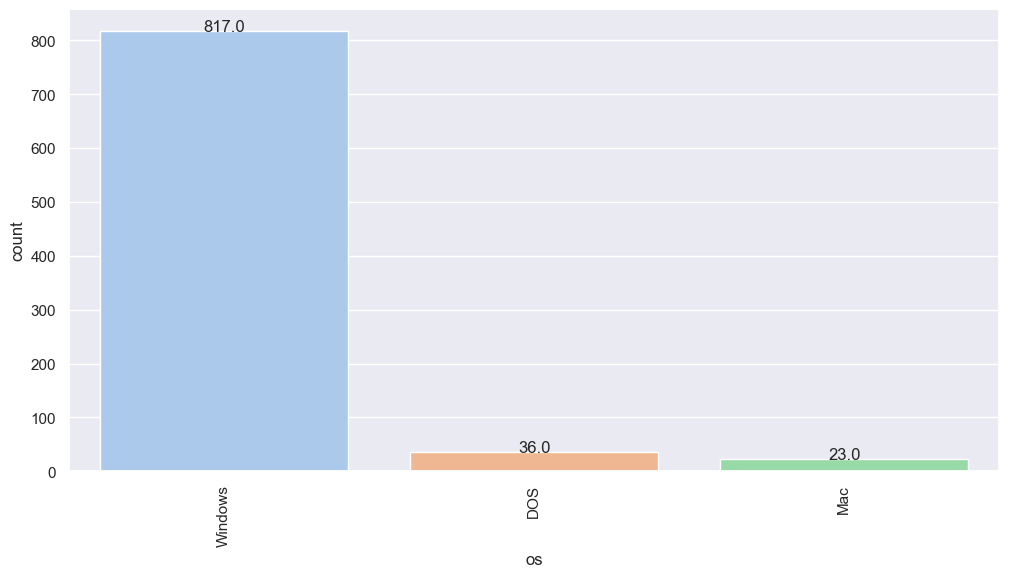

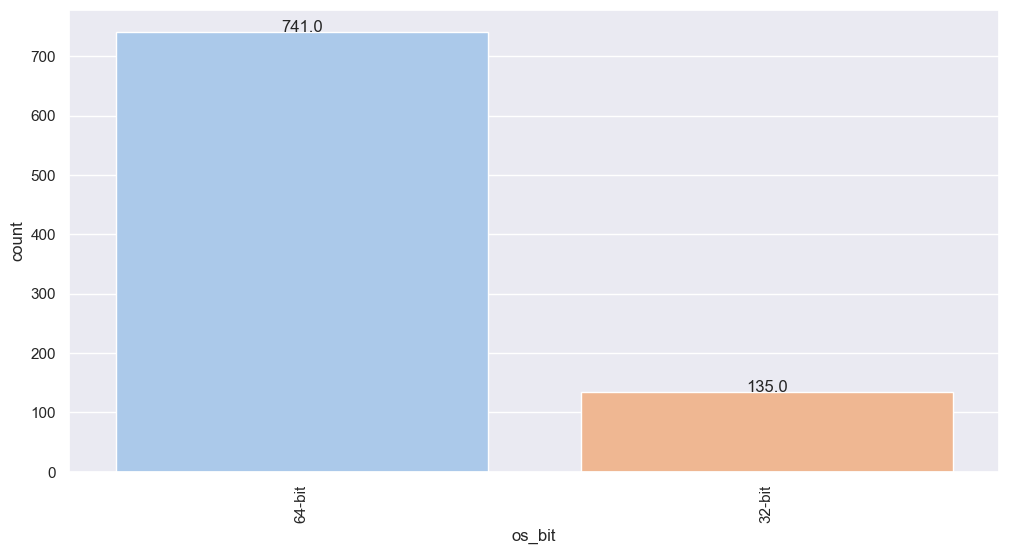

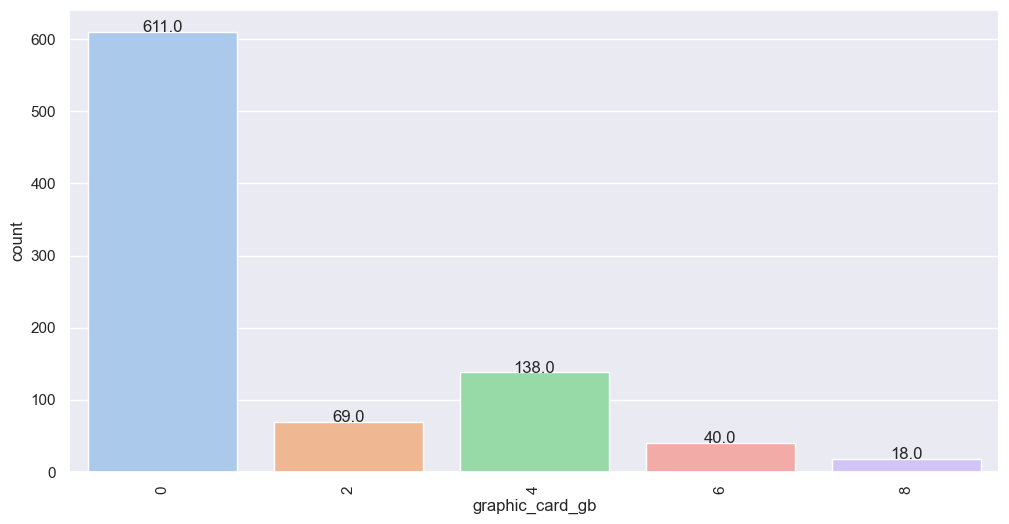

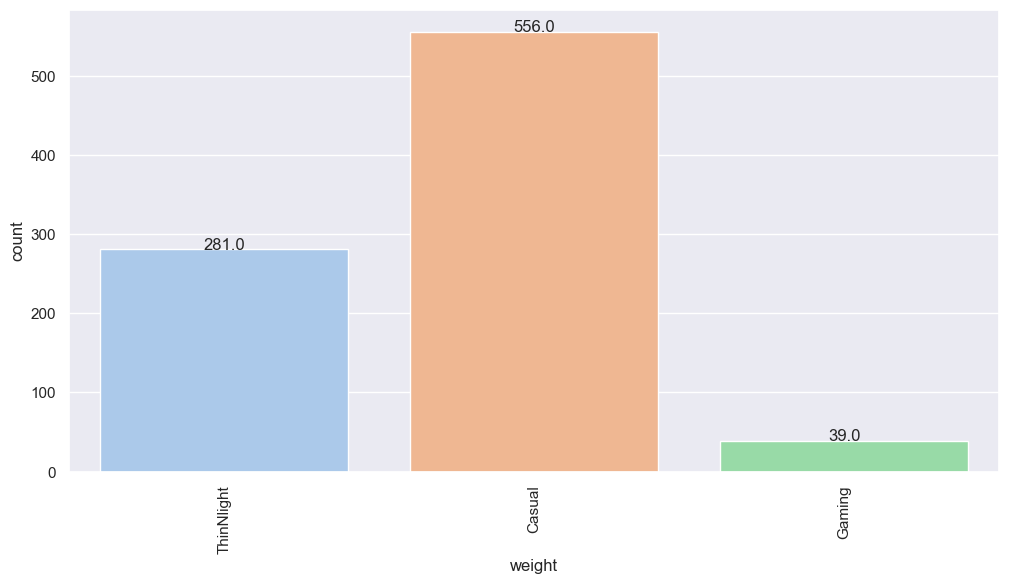

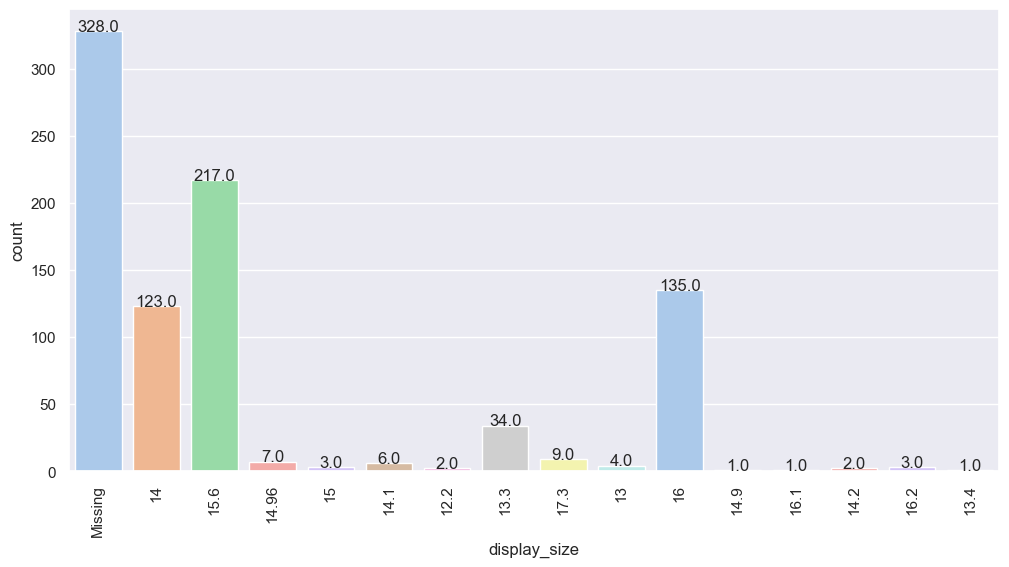

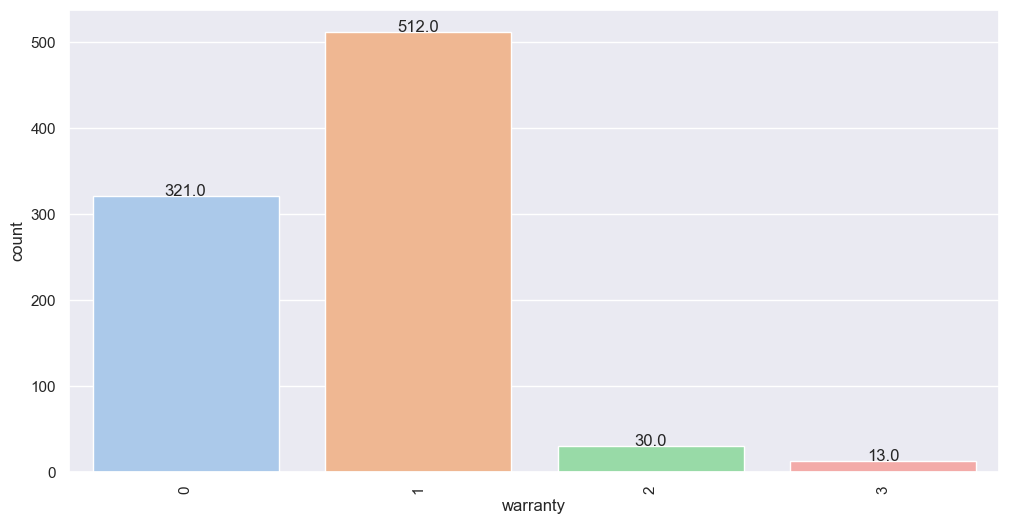

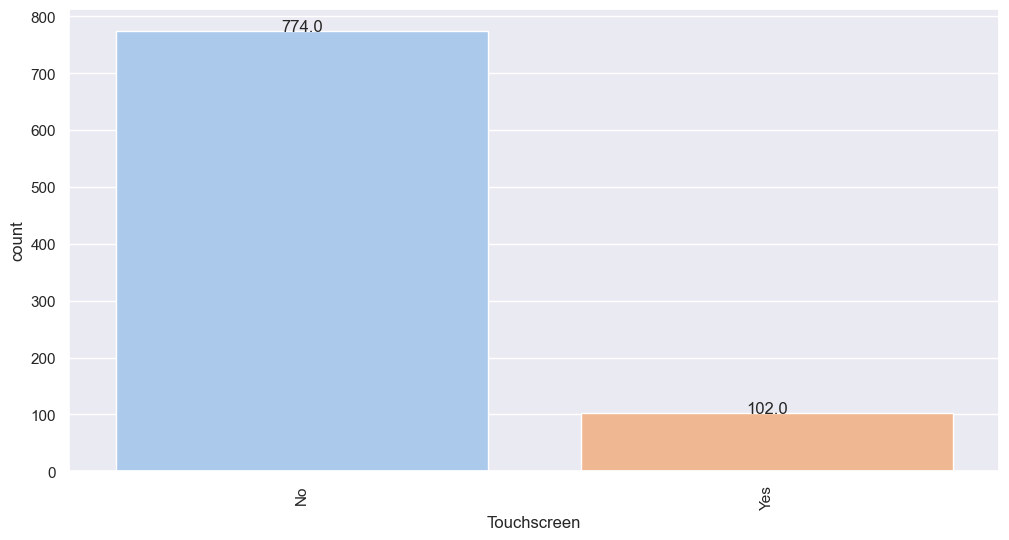

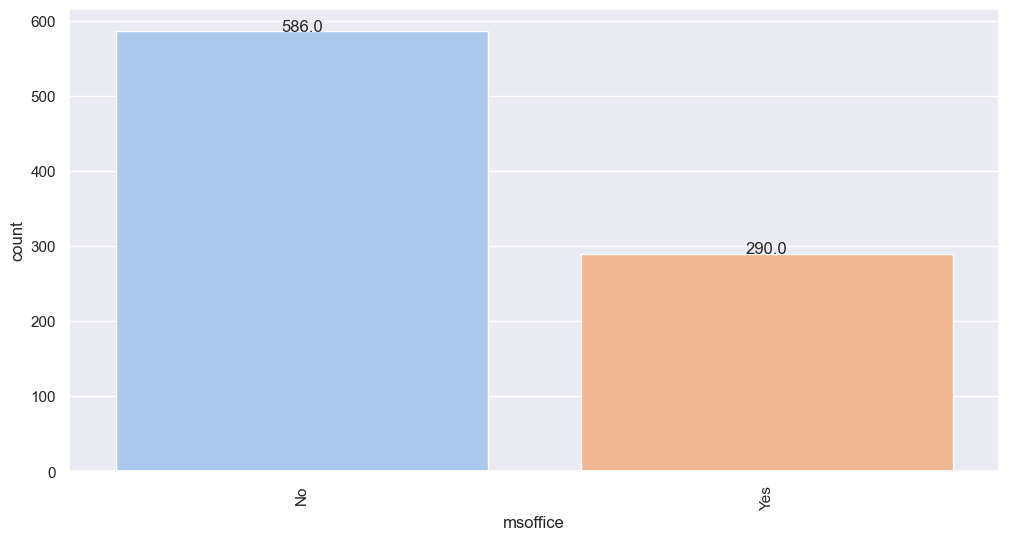

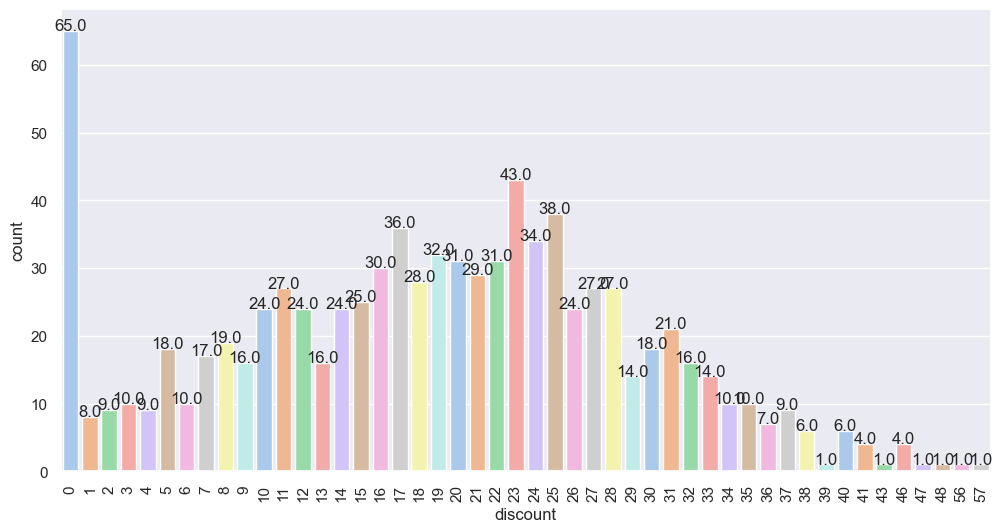

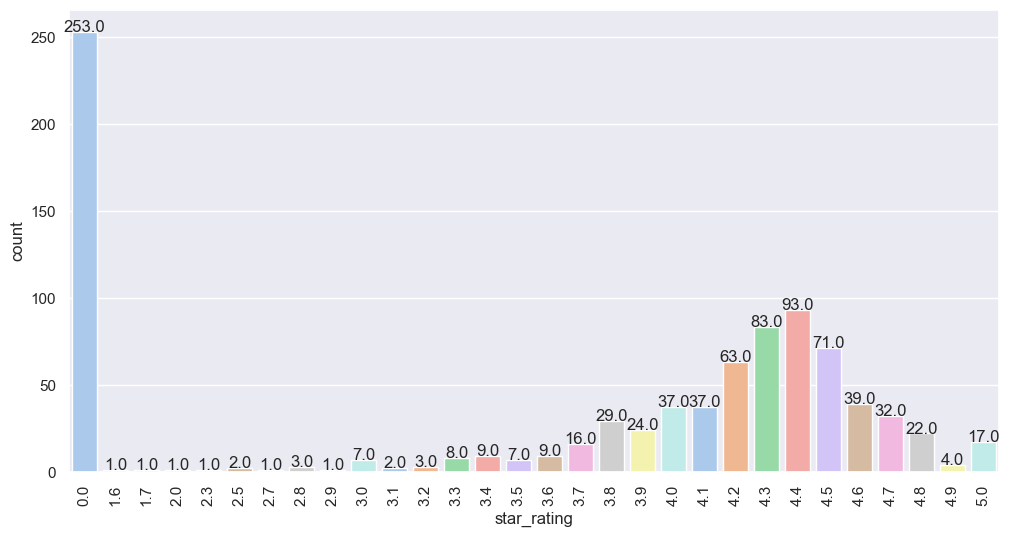

In [42]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = train,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

In [49]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
for col in train.select_dtypes(include=['object']).columns:
    train[col] = LabelEncoder().fit_transform(train[col])

# Calculate the correlation again
correlation = train.corr()
print(correlation['latest_price'].sort_values(ascending=False), '\n')


latest_price       1.000000
old_price          0.744950
graphic_card_gb    0.494891
ram_type           0.235857
Touchscreen        0.173069
model              0.145335
processor_name     0.109394
processor_brand    0.086008
warranty           0.034402
display_size       0.030192
hdd               -0.039884
os_bit            -0.059673
brand             -0.081038
msoffice          -0.099532
processor_gnrtn   -0.107847
ssd               -0.116571
star_rating       -0.172905
ratings           -0.174766
reviews           -0.175564
discount          -0.207282
weight            -0.263325
os                -0.314656
ram_gb            -0.404108
Name: latest_price, dtype: float64 



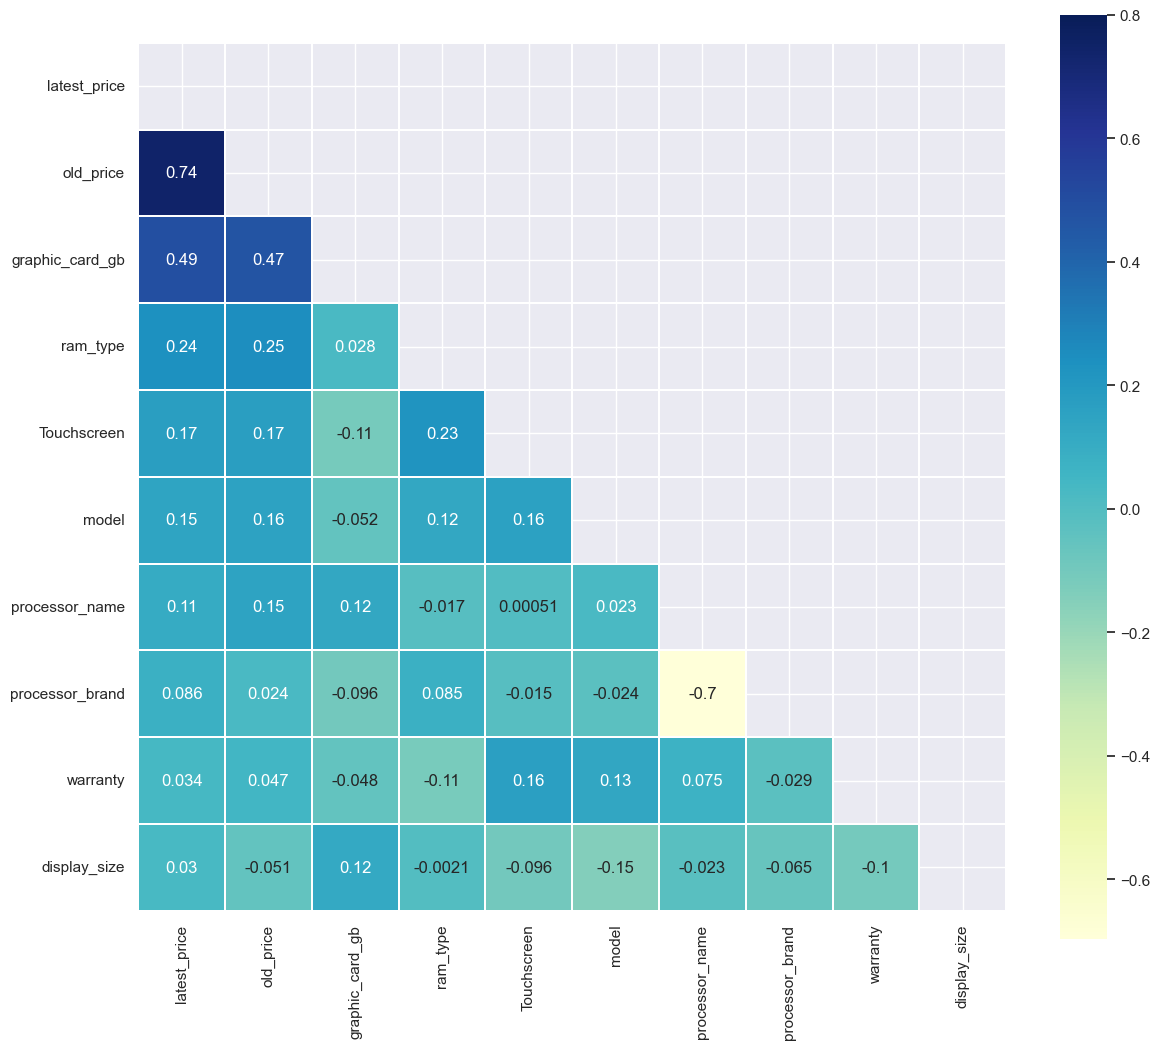

In [53]:
# Select top k features based on correlation with 'latest_price'
k = 10
cols = correlation.nlargest(k, 'latest_price')['latest_price'].index

# Calculate the correlation matrix for the selected features
cm = np.corrcoef(train[cols].values.T)

# Create a mask for the upper triangle of the selected correlation matrix
mask = np.triu(np.ones_like(cm, dtype=bool))

# Plot the heatmap
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(
    cm, mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True,
    cmap='YlGnBu', linecolor="white", xticklabels=cols.values,
    annot_kws={'size': 12}, yticklabels=cols.values
)
plt.show()


In [55]:
for feature in categorical_features:
  k=train[feature]
  print(f'Feature {feature} has unique values:',train[feature].unique())
  print(30*'---')

Feature brand has unique values: [ 8  3  5 17  2  4 13 20  6 10 19  9 15  7 12  1 16 11  0 18 14]
------------------------------------------------------------------------------------------
Feature processor_brand has unique values: [0 1 2 3 4]
------------------------------------------------------------------------------------------
Feature processor_name has unique values: [ 0  1  2  5  6  3 22 24  4  7  8  9 10 11 13 14 12 16 17 15 19 20 23 18
 21 25 26 27]
------------------------------------------------------------------------------------------
Feature processor_gnrtn has unique values: [0 7 1 4 5 6 3 2]
------------------------------------------------------------------------------------------
Feature ram_gb has unique values: [2 3 1 0]
------------------------------------------------------------------------------------------
Feature ram_type has unique values: [1 5 4 2 0 3]
------------------------------------------------------------------------------------------
Feature ssd has u

In [57]:
train['processor_gnrtn'].value_counts().to_frame()

count
processor_gnrtn       
1                  342
0                  239
7                  238
5                   37
4                   10
6                    6
2                    3
3                    1

In [59]:
train['display_size'].value_counts().to_frame()

count
display_size       
15              328
10              217
11              135
4               123
2                34
14                9
8                 7
5                 6
1                 4
9                 3
13                3
0                 2
6                 2
7                 1
12                1
3                 1

In [61]:
train.replace('Missing', np.NaN,inplace=True)

In [63]:
train.isnull().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [65]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [67]:
OH=['brand','processor_brand','processor_name','ram_type','os','os_bit','weight','Touchscreen','msoffice']

In [69]:
train.shape

(876, 23)

In [71]:
ind=range(876)
train['Index']=ind
train=train.set_index('Index')

In [73]:
for feature in OH:
  TBL=pd.get_dummies(train[feature]).add_prefix(feature)
  train=train.merge(TBL,on='Index')
  train.drop([feature],axis=1,inplace=True)

In [75]:
TX=['processor_gnrtn','ram_gb','ssd','hdd','display_size']

In [77]:
train.fillna('9999TH',inplace=True)

In [83]:
import re

# Iterate over each feature in TX
for feature in TX:
    # Convert each element to a string before using regex substitution
    K = list(train[feature])
    K1 = [float(re.sub(r"\D", "", str(i))) if isinstance(i, str) else float(i) for i in K]
    
    # Update the feature in the DataFrame with the cleaned numeric values
    train[feature] = K1


In [85]:
train.replace(9999, np.NaN,inplace=True)

In [87]:
train.drop('model',axis=1,inplace=True)

In [89]:
from sklearn.impute import KNNImputer

In [91]:
imputer = KNNImputer(n_neighbors=10, weights="uniform")

In [93]:
l=imputer.fit_transform(train)

In [95]:
train1=pd.DataFrame(l,columns=train.columns)

In [97]:
from sklearn.neighbors import LocalOutlierFactor

In [99]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
y_pred = clf.fit_predict(train1)

In [101]:
train1['Out']=y_pred

In [103]:
Out=train1[train1['Out']!=1]

In [105]:
Out.shape

(80, 86)

In [107]:
train2=train1[train1['Out']==1]

In [109]:
train2=train2.drop('Out',axis=1)

In [111]:
train2

processor_gnrtn  ram_gb  ssd  hdd  graphic_card_gb  display_size  \
0                0.0     2.0  0.0  1.0              0.0          15.0   
1                0.0     2.0  0.0  3.0              0.0          15.0   
2                0.0     2.0  2.0  0.0              0.0          15.0   
3                0.0     2.0  2.0  0.0              0.0          15.0   
4                0.0     2.0  4.0  0.0              0.0          15.0   
..               ...     ...  ...  ...              ...           ...   
868              7.0     2.0  1.0  0.0              6.0          11.0   
870              7.0     2.0  1.0  0.0              0.0          11.0   
871              7.0     2.0  1.0  0.0              0.0          11.0   
874              7.0     2.0  0.0  3.0              0.0          15.0   
875              0.0     3.0  7.0  0.0              0.0           4.0   

     warranty  latest_price  old_price  discount  ...  os2  os_bit0  os_bit1  \
0         0.0       24990.0    32790.0      23.0  ...  1.0      0.0      1.0   
1         0.0       19590.0    21325.0       8.0  ...  1.0      0.0      1.0   
2         0.0       19990.0    27990.0      28.0  ...  1.0      0.0      1.0   
3         0.0       21490.0    27990.0      23.0  ...  1.0      0.0      1.0   
4         0.0       24990.0    33490.0      25.0  ...  1.0      0.0      1.0   
..        ...           ...        ...       ...  ...  ...      ...      ...   
868       0.0      138990.0   210990.0      34.0  ...  1.0      1.0      0.0   
870       1.0      135990.0   172990.0      21.0  ...  1.0      0.0      1.0   
871       1.0      144990.0   194990.0      25.0  ...  1.0      0.0      1.0   
874       0.0       38990.0    47990.0      18.0  ...  1.0      1.0      0.0   
875       0.0       57490.0    78400.0      26.0  ...  0.0      0.0      1.0   

     weight0  weight1  weight2  Touchscreen0  Touchscreen1  msoffice0  \
0        0.0      0.0      1.0           1.0           0.0        1.0   
1        1.0      0.0      0.0           1.0           0.0        1.0   
2        0.0      0.0      1.0           1.0           0.0        1.0   
3        0.0      0.0      1.0           1.0           0.0        1.0   
4        0.0      0.0      1.0           1.0           0.0        1.0   
..       ...      ...      ...           ...           ...        ...   
868      1.0      0.0      0.0           1.0           0.0        1.0   
870      1.0      0.0      0.0           1.0           0.0        1.0   
871      1.0      0.0      0.0           1.0           0.0        1.0   
874      1.0      0.0      0.0           1.0           0.0        1.0   
875      0.0      0.0      1.0           1.0           0.0        1.0   

     msoffice1  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
..         ...  
868        0.0  
870        0.0  
871        0.0  
874        0.0  
875        0.0  

[796 rows x 85 columns]

In [113]:
train2.drop(['old_price','reviews'],axis=1,inplace=True)

In [115]:
y=train2['latest_price']
X=train2.drop(['latest_price'],axis=1)

In [117]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor(),Ridge()]
scores = dict()

for m in models:
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 256722926.22171688
MAE: 9321.783437499998
------------------------------ 

model: LinearRegression()
RMSE: 226344143.61238146
MAE: 10620.946421455048
------------------------------ 

model: ElasticNet()
RMSE: 614518704.9351981
MAE: 17608.723943535722
------------------------------ 

model: KNeighborsRegressor()
RMSE: 919311223.7004999
MAE: 20854.0075
------------------------------ 

model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_wei

In [121]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = train2.columns
d = scaler.fit_transform(train2)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

processor_gnrtn    ram_gb       ssd       hdd  graphic_card_gb  \
0              0.0  0.666667  0.000000  0.333333              0.0   
1              0.0  0.666667  0.000000  1.000000              0.0   
2              0.0  0.666667  0.285714  0.000000              0.0   
3              0.0  0.666667  0.285714  0.000000              0.0   
4              0.0  0.666667  0.571429  0.000000              0.0   

   display_size  warranty  latest_price  discount  star_rating  ...  os2  \
0           1.0       0.0      0.041515  0.500000         0.74  ...  1.0   
1           1.0       0.0      0.013492  0.173913         0.72  ...  1.0   
2           1.0       0.0      0.015568  0.608696         0.74  ...  1.0   
3           1.0       0.0      0.023352  0.500000         0.74  ...  1.0   
4           1.0       0.0      0.041515  0.543478         0.74  ...  1.0   

   os_bit0  os_bit1  weight0  weight1  weight2  Touchscreen0  Touchscreen1  \
0      0.0      1.0      0.0      0.0      1.0           1.0           0.0   
1      0.0      1.0      1.0      0.0      0.0           1.0           0.0   
2      0.0      1.0      0.0      0.0      1.0           1.0           0.0   
3      0.0      1.0      0.0      0.0      1.0           1.0           0.0   
4      0.0      1.0      0.0      0.0      1.0           1.0           0.0   

   msoffice0  msoffice1  
0        1.0        0.0  
1        1.0        0.0  
2        1.0        0.0  
3        1.0        0.0  
4        1.0        0.0  

[5 rows x 83 columns]

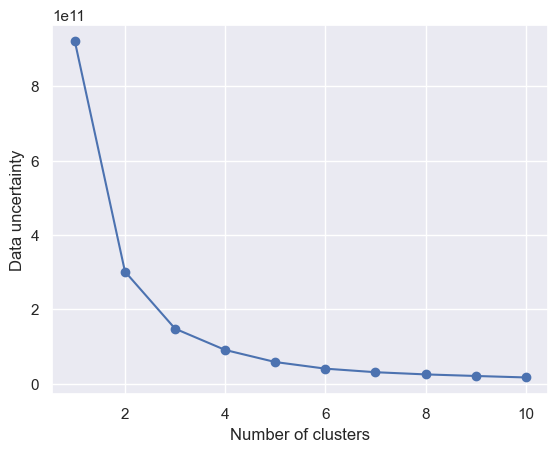

In [123]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train2)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()